In [ ]:
"""
Description: this script was designed to take line plot data from a .xlsx file as input, create normalized line plots, and compare the rate of increase in signal over distance at the edge of a biological structure captured with STED imaging. 

Input: One .xlsx file with data organized as follows:

    Sheet 1: values for channel 1 in image 1
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 2: values for channel 2 in image 1
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 3: values for channel 1 in image 2
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...
        
    Sheet 4: values for channel 2 in image 2
        Column 1    |   Column 2    |   Column 3    |   Column 4    |   etc...
        distance 1      intensity 1     distance 2      intensity 2     etc...

Output: Normalized line plots for each pair of lines between channels. 

Written by: Lukas Fuentes (Bewersdorf Lab)

Last updated: 5-25-2023
"""

In [1]:
######## Parameters to change ########

intens_list = [0.4,0.45,0.5,0.55,0.6] # list of intensity measurements where radii will be measured
thresh = 25 #the grey value cutoff for data to be analyzed. If the max grey value of a dataset is below this, it will be ignored

savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\Analysis_output\\"  #File path to folder where you want to save the output of this script
save_folder = "PLD3_analysis"
ver = "_V3_testing"

name = "MAG" #Should be "PLD3", "MAG", or "Caspr"

######## End of Parameters to change ########

if name == "PLD3":
    # PLD3 data
    data1 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\PLD3_data\\summary STED data PLD3 proximity labeling 5min, PLD3-647N, streptatvidin-594.lif.xlsx"
elif name == "MAG":
    # MAG data
    data1 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\MAG_data\\summary MAG proximity labeling sted quant.xlsx"
elif name == "Caspr":
    # Caspr data
    # full dataset
    data1 = r"C:\Users\laf62\Desktop\LAF-Drive\Yale_University\Bewersdorf_Lab\Yifei-Lukas-Collab\CASPR_data\summary sted data - V2 fixed.xlsx"
    # testing low signal vs high signal
    #data1 = r"C:\Users\laf62\Desktop\LAF-Drive\Yale_University\Bewersdorf_Lab\Yifei-Lukas-Collab\CASPR_data\Caspr - v3.xlsx"
else:
    print("Please, select one of the viable name options: PLD3, MAG, or Caspr")

# Don't touch - creating folder path for saving the output data
savepath = savedir + name + '_analysis' + ver
from pathlib import Path
Path(savepath).mkdir(parents=True, exist_ok=True)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import csv

#Color blind friendly colors to use in plots
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# The following syntax was found at https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook
# Read .xlsx file
adata = pd.read_excel(data1, sheet_name=None)#,index_col=False)
# Extract names of sheets
xls = pd.ExcelFile(data1)
sheets = xls.sheet_names

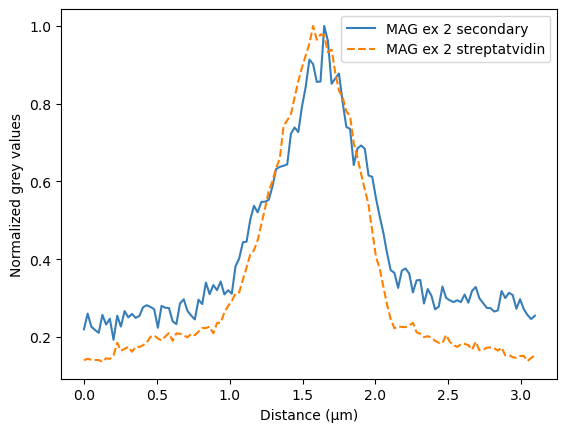

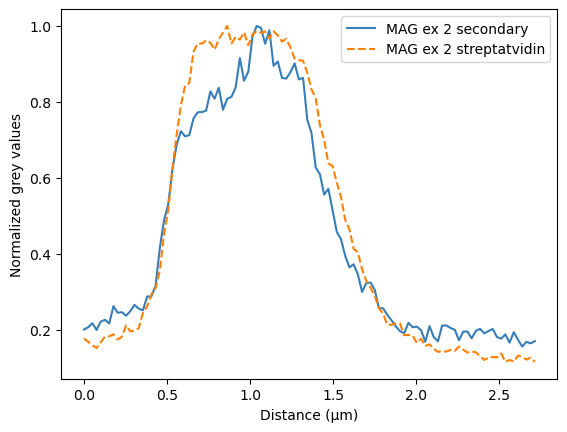

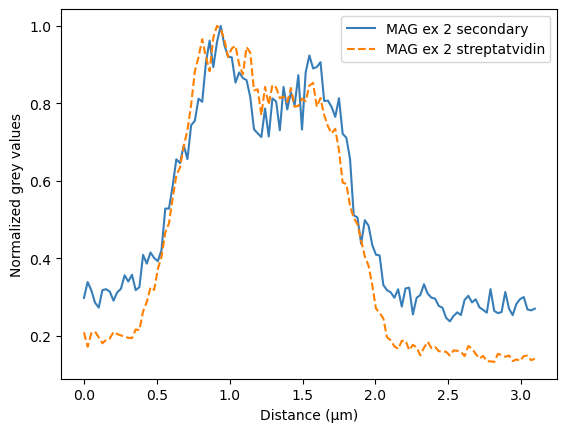

<Figure size 640x480 with 0 Axes>

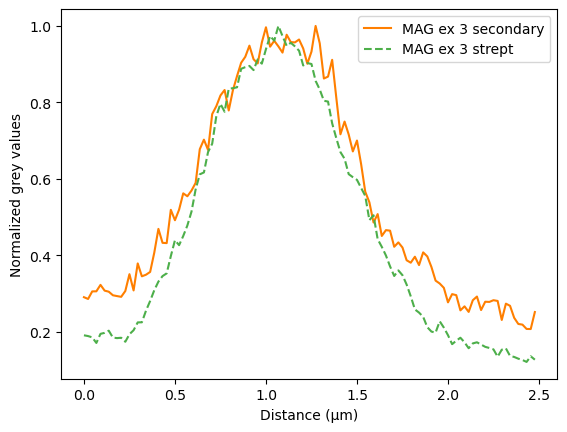

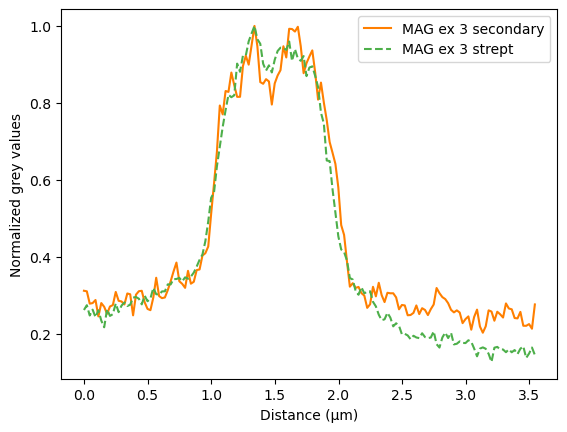

<Figure size 640x480 with 0 Axes>

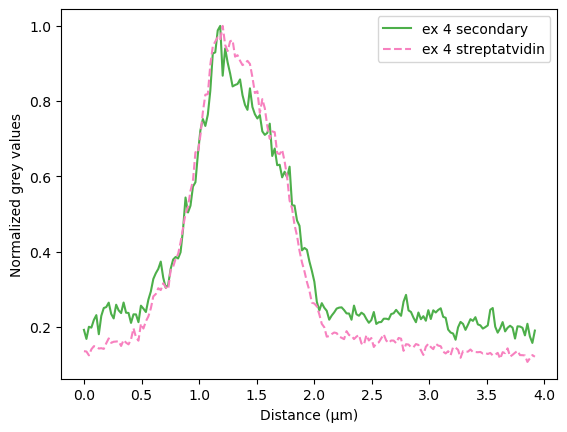

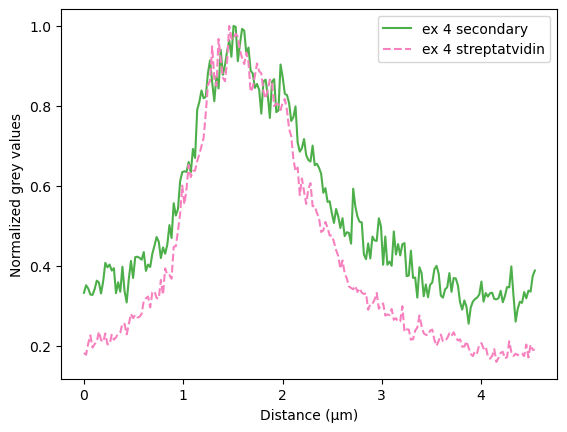

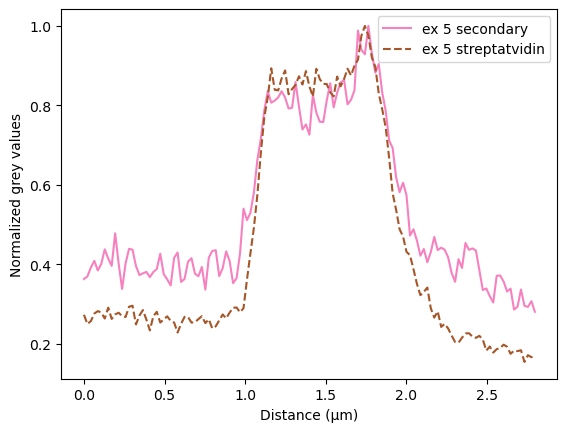

<Figure size 640x480 with 0 Axes>

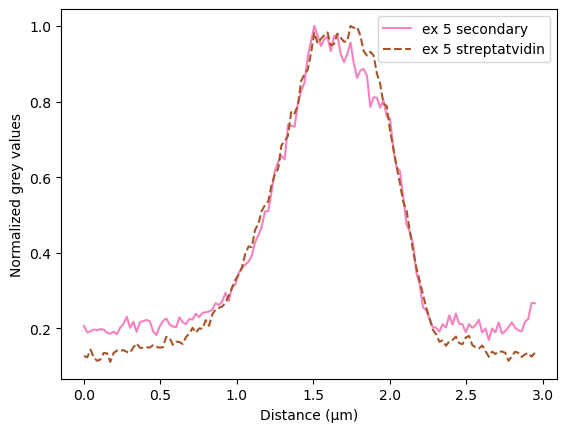

In [3]:
#Extract distance column and grey values column, remove NaNs from both, and plot the pairs
min_int = np.min(intens_list)
for a in range(int(len(sheets)/2)):
    npdata1 = np.array(adata[sheets[2*a]])
    npdata2 = np.array(adata[sheets[1+(2*a)]])
    for b in range(int(np.size(npdata1,1)/2)):
        fig = plt.figure()
        dist1 = npdata1[:,0+(2*b)]
        dist2 = npdata2[:,0+(2*b)]
        gv1 = npdata1[:,1+(2*b)]
        gv2 = npdata2[:,1+(2*b)]
        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]
        gv1 = gv1[~np.isnan(gv1)]
        gv2 = gv2[~np.isnan(gv2)]
        #Normalize the grey values
        gv_max1 = np.max(gv1)
        gv_max2 = np.max(gv2)
        gv_norm1 = gv1/gv_max1
        gv_norm2 = gv2/gv_max2
        mx1 = np.argmax(gv_norm1)
        mx2 = np.argmax(gv_norm2)
        il11 = gv_norm1[:mx1]
        il12 = gv_norm1[mx1:]
        il21 = gv_norm2[:mx2]
        il22 = gv_norm2[mx2:]
        arr11 = np.asarray(il11)
        arr12 = np.asarray(il12)
        arr21 = np.asarray(il21)
        arr22 = np.asarray(il22)
        gv_min11 = np.min(arr11)
        gv_min12 = np.min(arr12)
        gv_min21 = np.min(arr21)
        gv_min22 = np.min(arr22)
        # if the max grey value in either channel is < threshold, skip this iteration
        if gv_max1 < thresh or gv_max2 < thresh:
            continue
        elif gv_min11 > min_int or gv_min12 > min_int or gv_min21 > min_int or gv_min22 > min_int:
            continue
        plt.plot(dist1, gv_norm1, label=sheets[2*a], color=CB_color_cycle[a])
        plt.plot(dist2, gv_norm2, label=sheets[1+2*a], linestyle='--', color=CB_color_cycle[a+1])
        plt.legend()
        plt.xlabel('Distance (\u03BCm)')
        plt.ylabel('Normalized grey values')
        plot_save = savepath + '\\' + sheets[2*a] +'_vs_' + sheets[1+2*a] + '_plot' + str(b) + '_' + name + ver + '.png'
        plt.savefig(plot_save, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.05,
        metadata=None)
        plt.show()
        plt.close()

In [4]:
# Function to find the indices of the grey values that are closest to a list of input values. It returns two indices, one on each side of the peak, for each input value

# Old iterations of this function

# def closest_values(input_list, input_values):
#     res = []
#     mx = np.argmax(input_list)
#     il1 = input_list[:mx]
#     il2 = input_list[mx:]
#     arr1 = np.asarray(il1)
#     arr2 = np.asarray(il2)
#     for a in range(len(input_values)):
#         i1 = (np.abs(arr1 - input_values[a])).argmin()
#         i2 = (np.abs(arr2 - input_values[a])).argmin()
#         res.append([i1,mx+i2])
#     return res#arr[i]

# def closest_values_V2(input_list, input_values):
#     res1 = []
#     res2 = []
#     mx = np.argmax(input_list)
#     il1 = input_list[:mx]
#     il2 = input_list[mx:]
#     arr1 = np.asarray(il1)
#     arr2 = np.asarray(il2)
#     for a in input_values:
#         i1 = np.where(np.logical_and(arr1>=a-0.01, arr1<=a+0.01))
#         i2 = np.where(np.logical_and(arr2>=a-0.01, arr2<=a+0.01))
#         res1.append([i1])
#         res2.append([mx+i2])
#     return res1, res2#arr[i]

# from heapq import nsmallest
# def closest_values_V3(input_list, input_values):
#     K = 3
#     res1 = []
#     res2 = []
#     mx = np.argmax(input_list)
#     il1 = input_list[:mx]
#     il2 = input_list[mx:]
#     arr1 = np.asarray(il1)
#     arr2 = np.asarray(il2)
#     for a in input_values:
#         i1 = nsmallest(3, arr1, key=lambda x: abs(x - a))
#         i1 = sorted(range(len(arr1)), key=lambda sub: arr1[sub])[:K]
#         i2 = nsmallest(3, arr2, key=lambda x: abs(x - a))
#         res1.append(i1)
#         res2.append(mx+i2)
#     return np.asarray(res1), np.asarray(res2)#arr[i]

# Latest iteration of this function
def closest_values_V4(input_list, input_values):
    '''
    Inputs:
        input_list: numpy array of grey values or normalized grey values from your data (this should come from your line plot data)
        
        input_values: numpy array of grey values you'd like to compare the radii of each channel at (these are arbitrary numbers you select to measure radii differences at differing line plot heights)
            - Keep in mind if you're using grey values or normalized grey values in "input_list" to choose appropriate values for "input_values"
            
    Output:
        res: numpy array of indices of the input_list that are closest to input_value(s)
    '''
    res = []
    mx = np.argmax(input_list)
    il1 = input_list[:mx]
    il2 = input_list[mx:]
    arr1 = np.asarray(il1)
    arr2 = np.asarray(il2)
    for a in range(len(input_values)):
        # Find indices where the grey values at x index is < input_value and the grey values at x-1 index is > input_value (grey values ramping up)
        i1 = [index1 for index1 in range(1,len(arr1))
        if arr1[index1] > input_values[a] and arr1[index1-1] < input_values[a]]
        # Find indices where the grey values at x index is > input_value and the grey values at x-1 index is < input_value (grey values ramping down)
        i2 =[index2 for index2 in range(1,len(arr2))
        if arr2[index2] < input_values[a] and arr2[index2-1] > input_values[a]]
        i1min = np.min(i1)
        i2min = np.max(i2)
        res.append([i1min,mx+i2min])
    return res

def find_outliers(data):
    '''
    -----
    Input
    -----
        data: (N,) numpy array of floats
            array to filter out outliers
            
    ------
    Output
    ------
        filt_data: (N-# of outliers,) numpy array of floats
            'data' with outliers removed
    '''
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    low_inds = data < lower_bound
    high_inds = data > upper_bound
    outlier_inds = low_inds + high_inds
    outliers = data[outlier_inds]
    #outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers, outlier_inds

In [5]:
# Quantify the radii of the secondary and steptavidin labeling
dist_diff1 = np.array([])
dist_diff2 = np.array([])
inds1_all = []
inds2_all = []
for a in range(int(len(sheets)/2)):
    npdata1 = np.array(adata[sheets[2*a]])
    npdata2 = np.array(adata[sheets[1+(2*a)]])
    for b in range(int(np.size(npdata1,1)/2)):
        dist1 = npdata1[:,0+(2*b)]
        dist2 = npdata2[:,0+(2*b)]
        gv1 = npdata1[:,1+(2*b)]
        gv2 = npdata2[:,1+(2*b)]
        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]
        gv1 = gv1[~np.isnan(gv1)]
        gv2 = gv2[~np.isnan(gv2)]
        #Normalize the grey values
        gv_max1 = np.max(gv1)
        gv_max2 = np.max(gv2)
        gv_norm1 = gv1/gv_max1
        gv_norm2 = gv2/gv_max2
        mx1 = np.argmax(gv_norm1)
        mx2 = np.argmax(gv_norm2)
        il11 = gv_norm1[:mx1]
        il12 = gv_norm1[mx1:]
        il21 = gv_norm2[:mx2]
        il22 = gv_norm2[mx2:]
        arr11 = np.asarray(il11)
        arr12 = np.asarray(il12)
        arr21 = np.asarray(il21)
        arr22 = np.asarray(il22)
        gv_min11 = np.min(arr11)
        gv_min12 = np.min(arr12)
        gv_min21 = np.min(arr21)
        gv_min22 = np.min(arr22)
        # if the max grey value in either channel is < threshold, skip this iteration
        if gv_max1 < thresh or gv_max2 < thresh:
            continue
        elif gv_min11 > min_int or gv_min12 > min_int or gv_min21 > min_int or gv_min22 > min_int:
            continue
        # Find indices of grey values closest to input values on either side of the peak intensity
        inds1 = closest_values_V4(gv_norm1,intens_list)
        inds2 = closest_values_V4(gv_norm2,intens_list)
        inds1_all.append(inds1)
        inds2_all.append(inds2)
        # Calculate radii
        for c in range(len(intens_list)):
            dist_diff1 = np.append(dist_diff1,dist1[inds1[c][1]]-dist1[inds1[c][0]])
            dist_diff2 = np.append(dist_diff2,dist2[inds2[c][1]]-dist2[inds2[c][0]])

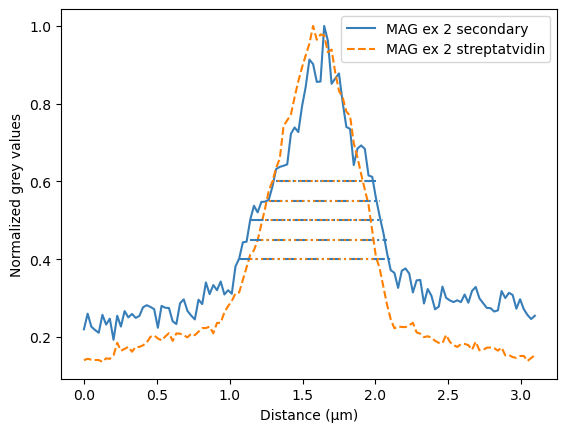

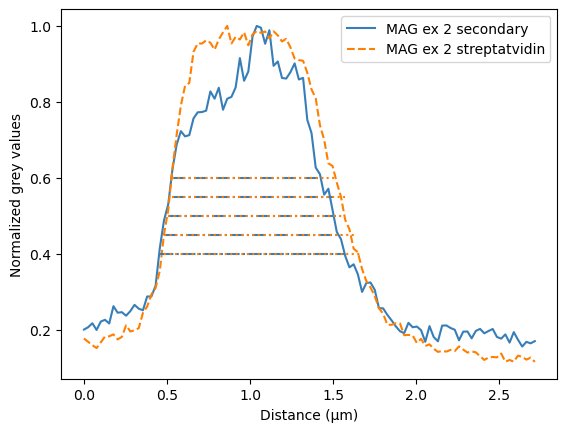

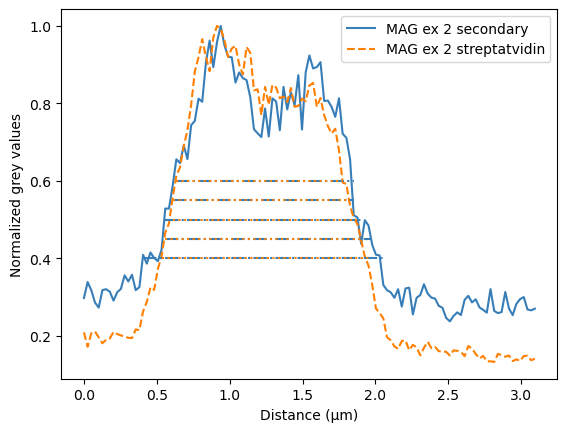

<Figure size 640x480 with 0 Axes>

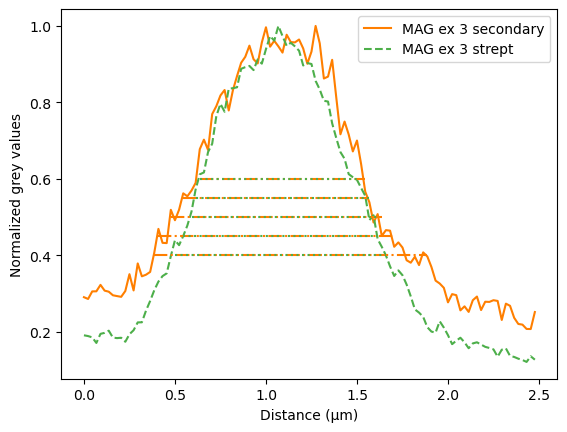

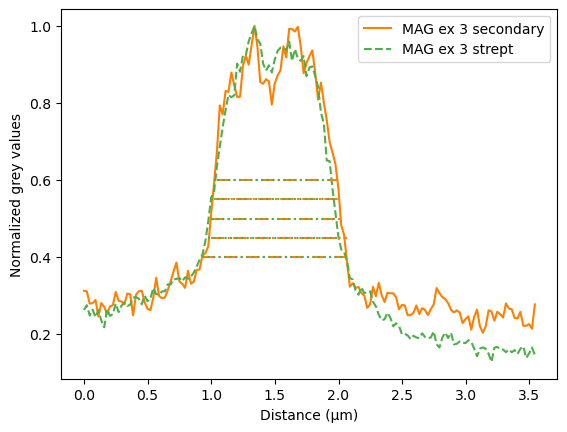

<Figure size 640x480 with 0 Axes>

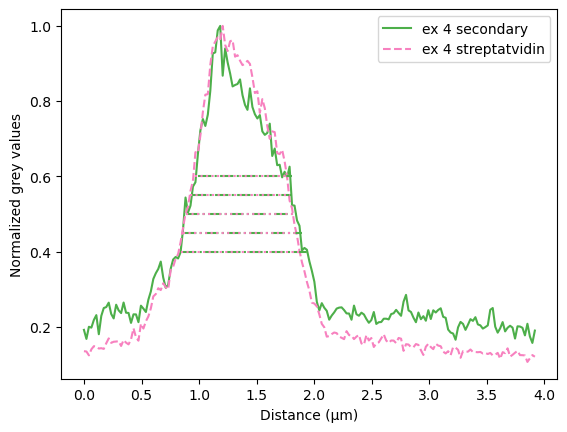

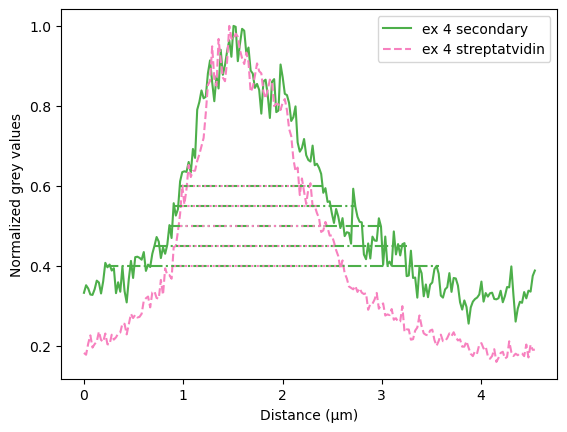

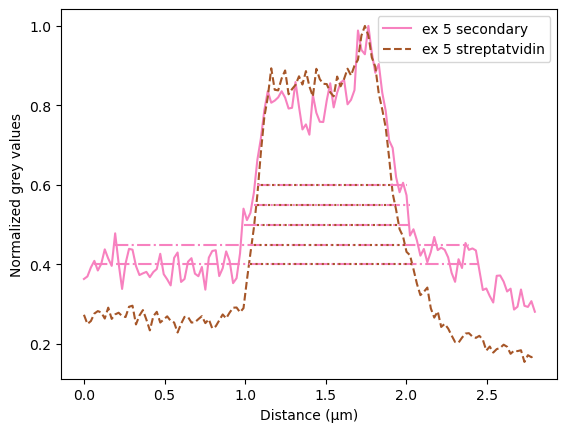

<Figure size 640x480 with 0 Axes>

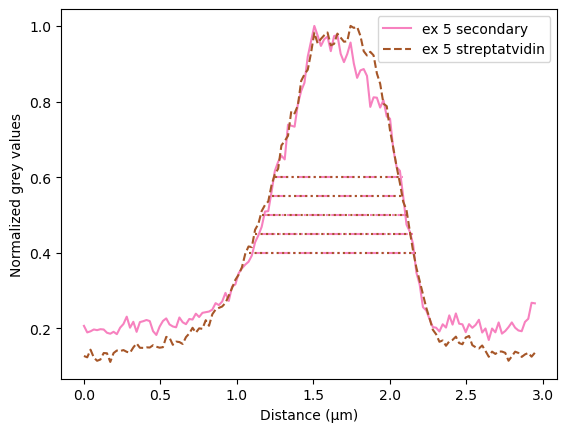

In [6]:
# Plots with lines showing where widths were measured
min_int = np.min(intens_list)
count = 0
for a in range(int(len(sheets)/2)):
    npdata1 = np.array(adata[sheets[2*a]])
    npdata2 = np.array(adata[sheets[1+(2*a)]])
    for b in range(int(np.size(npdata1,1)/2)):
        fig = plt.figure()
        dist1 = npdata1[:,0+(2*b)]
        dist2 = npdata2[:,0+(2*b)]
        gv1 = npdata1[:,1+(2*b)]
        gv2 = npdata2[:,1+(2*b)]
        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]
        gv1 = gv1[~np.isnan(gv1)]
        gv2 = gv2[~np.isnan(gv2)]
        #Normalize the grey values
        gv_max1 = np.max(gv1)
        gv_max2 = np.max(gv2)
        gv_norm1 = gv1/gv_max1
        gv_norm2 = gv2/gv_max2
        mx1 = np.argmax(gv_norm1)
        mx2 = np.argmax(gv_norm2)
        il11 = gv_norm1[:mx1]
        il12 = gv_norm1[mx1:]
        il21 = gv_norm2[:mx2]
        il22 = gv_norm2[mx2:]
        arr11 = np.asarray(il11)
        arr12 = np.asarray(il12)
        arr21 = np.asarray(il21)
        arr22 = np.asarray(il22)
        gv_min11 = np.min(arr11)
        gv_min12 = np.min(arr12)
        gv_min21 = np.min(arr21)
        gv_min22 = np.min(arr22)
        # if the max grey value in either channel is < threshold, skip this iteration
        if gv_max1 < thresh or gv_max2 < thresh:
            continue
        elif gv_min11 > min_int or gv_min12 > min_int or gv_min21 > min_int or gv_min22 > min_int:
            continue
        plt.plot(dist1, gv_norm1, label=sheets[2*a], color=CB_color_cycle[a])
        plt.plot(dist2, gv_norm2, label=sheets[1+2*a], linestyle='--', color=CB_color_cycle[a+1])
        for c in range(len(intens_list)):
            plt.plot(dist1[inds1_all[count][c]],[intens_list[c],intens_list[c]],color=CB_color_cycle[a],linestyle='-.')
            plt.plot(dist2[inds2_all[count][c]],[intens_list[c],intens_list[c]],color=CB_color_cycle[a+1],linestyle='dotted')
        count = count + 1
        plt.legend()
        plt.xlabel('Distance (\u03BCm)')
        plt.ylabel('Normalized grey values')
        plot_save = savepath + '\\' + sheets[2*a] +'_vs_' + sheets[1+2*a] + '_plot' + str(b) + '_' + name + ver + '.png'
        plt.savefig(plot_save, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.05,
        metadata=None)
        plt.show()
        plt.close()

66.0


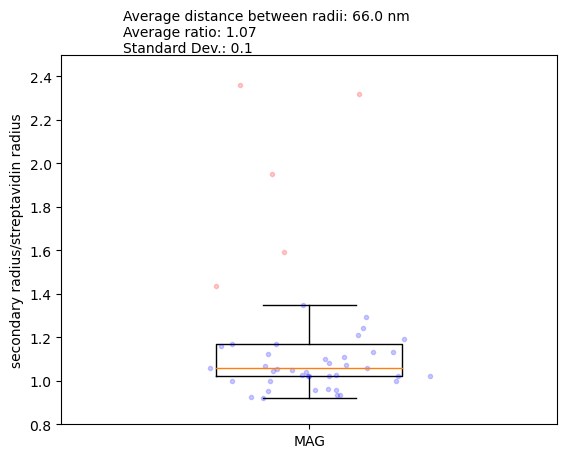

W = 135.0, p-value = 0.000637


In [7]:

# Calculate ratio of radii
rat = dist_diff1/dist_diff2
# Find outliers
outliers, outlier_inds = find_outliers(rat)
not_outliers_inds = np.bitwise_not(outlier_inds)
# Average distance between secondary and streptavidin (positive means secondary has a larger radius)
avg_diff = np.around(np.average((dist_diff1[not_outliers_inds]-dist_diff2[not_outliers_inds])*1000))
print(avg_diff)
# Calculate other stats with outliers filtered out
rat_min = np.around(np.min(rat)-0.1,1)
rat_max = np.around(np.max(rat)+0.1,1)
rat_avg = np.around(np.average(rat[not_outliers_inds]),2)
rat_std = np.around(np.std(rat[not_outliers_inds]),2)

# Plot box plot with individidual points
fig = plt.figure()
plt.boxplot(rat,sym='')
x = np.random.normal(1, 0.04, size=len(rat))
plt.plot(x[not_outliers_inds], rat[not_outliers_inds], 'b.', alpha=0.2)
plt.plot(x[outlier_inds], rat[outlier_inds], 'r.', alpha=0.2)
plt.ylim([rat_min,rat_max])
plt.xlim([0.8,1.2])
plt.ylabel('secondary radius/streptavidin radius')
plt.xticks([1], [name])
plt.text(0.85,rat_max+0.01,'Average distance between radii: ' + str(avg_diff) + ' nm' + 
        '\nAverage ratio: ' + str(rat_avg) +
        '\nStandard Dev.: ' + str(rat_std))
rat_save = savepath + '\\' + sheets[2*a] +'_vs_' + sheets[1+2*a] + '_ratio' + str(b) + '_' + name + ver + '.png'
plt.savefig(rat_save, dpi=300, facecolor='w', edgecolor='w',
    orientation='portrait', format=None,
    transparent=False, bbox_inches="tight", pad_inches=0.05,
    metadata=None)
plt.show()
plt.close()
# Statistics without outliers
from scipy.stats import wilcoxon as wil

rat_stat = np.array(rat[not_outliers_inds])
null = 1

W, p = wil(rat_stat - null)

print("W = %.1f, p-value = %f" % (W, p))

In [ ]:
# Average distance between secondary and streptavidin (positive means secondary has a larger radius)
avg_diff = np.around(np.average((dist_diff1-dist_diff2)*1000))
print(avg_diff)

rat = dist_diff1/dist_diff2

# Plot histogram
fig = plt.figure()
x = np.random.normal(1, 0.04, size=len(rat))
plt.hist(rat,bins=20, edgecolor = 'k')
plt.xlabel('secondary radius/streptavidin radius')
plt.ylabel('Frequency')
#plt.xticks([1], [name])
#plt.text(0.75,2.5,'average distance between radii: ' + str(avg_diff) + ' nm')
rat_hist_save = savepath + '\\' + sheets[2*a] +'_vs_' + sheets[1+2*a] + '_ratio_hist' + str(b) + '_' + name + ver + '.png'
plt.savefig(rat_hist_save, dpi=300, facecolor='w', edgecolor='w',
    orientation='portrait', format=None,
    transparent=False, bbox_inches="tight", pad_inches=0.05,
    metadata=None)
plt.show()
plt.close()

# Statistics
from scipy.stats import wilcoxon as wil

rat = np.array(rat)
null = 1

W, p = wil(rat - null)

print("W = %.1f, p-value = %f" % (W, p))

In [ ]:
ones = np.ones(20)
# ones2 = np.full(20,0.01)
total = np.array([0.99 if i < 10 else 1.01 for i in range(20)])

W, p = wil(ones-total)
print("W = %.1f, p-value = %.3f" % (W, p))

In [ ]:
# total = [np.full(10,0.99),np.full(10,0.01)]
total = np.array([0.99 if i < 10 else 1.01 for i in range(20)])
total